# Importing libraries


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from sklearn.metrics import roc_auc_score,roc_curve,auc
from math import sqrt

# importing datasets:

In [3]:
data=pd.read_csv('final_dataset (1).csv')
data

,Unnamed: 0,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre,Top100
0,0,0.556,0.864,-5.870,0.0584,0.009580,0.000000,0.2090,0.400,105.143,5,0
1,1,0.737,0.463,-7.828,0.0792,0.008170,0.447000,0.2550,0.324,123.881,9,0
2,2,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.1670,0.875,91.455,9,0
3,3,0.331,0.943,-3.188,0.0698,0.007210,0.000002,0.2420,0.296,94.612,0,0
4,4,0.589,0.890,-3.719,0.0603,0.000481,0.000820,0.2010,0.692,90.598,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8647,9221,0.783,0.840,-3.416,0.0510,0.174000,0.000000,0.4120,0.839,95.001,8,1
8648,9222,0.669,0.308,-10.068,0.0290,0.883000,0.000000,0.0984,0.520,64.934,7,1
8649,9223,0.544,0.781,-6.160,0.0311,0.005850,0.000000,0.1910,0.527,144.075,2,1
8650,9224,0.713,0.831,-4.750,0.1500,0.016800,0.000000,0.1180,0.584,173.948,7,1


In [4]:
# dropping the unnecessary columns:

data.drop('Unnamed: 0',axis=1,inplace=True)
data

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre,Top100
0,0.556,0.864,-5.870,0.0584,0.009580,0.000000,0.2090,0.400,105.143,5,0
1,0.737,0.463,-7.828,0.0792,0.008170,0.447000,0.2550,0.324,123.881,9,0
2,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.1670,0.875,91.455,9,0
3,0.331,0.943,-3.188,0.0698,0.007210,0.000002,0.2420,0.296,94.612,0,0
4,0.589,0.890,-3.719,0.0603,0.000481,0.000820,0.2010,0.692,90.598,5,0
...,...,...,...,...,...,...,...,...,...,...,...
8647,0.783,0.840,-3.416,0.0510,0.174000,0.000000,0.4120,0.839,95.001,8,1
8648,0.669,0.308,-10.068,0.0290,0.883000,0.000000,0.0984,0.520,64.934,7,1
8649,0.544,0.781,-6.160,0.0311,0.005850,0.000000,0.1910,0.527,144.075,2,1
8650,0.713,0.831,-4.750,0.1500,0.016800,0.000000,0.1180,0.584,173.948,7,1


In [5]:
# Checkinng shape of dataset
data.shape

(8652, 11)

In [6]:
#chceking the general information of data
data.info

<bound method DataFrame.info of       Danceability  Energy  Loudness  Speechiness  Acousticness  \
0            0.556   0.864    -5.870       0.0584      0.009580   
1            0.737   0.463    -7.828       0.0792      0.008170   
2            0.618   0.938    -3.442       0.0456      0.017900   
3            0.331   0.943    -3.188       0.0698      0.007210   
4            0.589   0.890    -3.719       0.0603      0.000481   
...            ...     ...       ...          ...           ...   
8647         0.783   0.840    -3.416       0.0510      0.174000   
8648         0.669   0.308   -10.068       0.0290      0.883000   
8649         0.544   0.781    -6.160       0.0311      0.005850   
8650         0.713   0.831    -4.750       0.1500      0.016800   
8651         0.836   0.544    -5.975       0.0943      0.040300   

      Instrumentalness  Liveness  Valence    Tempo  Genre  Top100  
0             0.000000    0.2090    0.400  105.143      5       0  
1             0.447000    0

<AxesSubplot:xlabel='Top100', ylabel='count'>

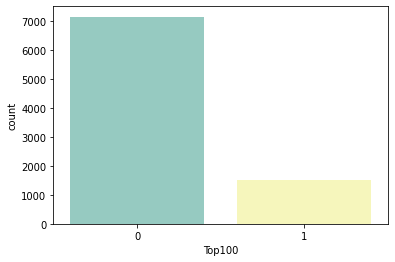

In [7]:
# Plotting countplot output classes
sns.countplot(x="Top100",data=data,palette="Set3")

In [8]:
data['Top100'].value_counts()


0    7151
1    1501
Name: Top100, dtype: int64

In [9]:
# Splitting into independent and dependent variable
X=data.drop("Top100",axis=1)    # excluding output column
y=data["Top100"]

In [10]:
X

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,0.556,0.864,-5.870,0.0584,0.009580,0.000000,0.2090,0.400,105.143,5
1,0.737,0.463,-7.828,0.0792,0.008170,0.447000,0.2550,0.324,123.881,9
2,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.1670,0.875,91.455,9
3,0.331,0.943,-3.188,0.0698,0.007210,0.000002,0.2420,0.296,94.612,0
4,0.589,0.890,-3.719,0.0603,0.000481,0.000820,0.2010,0.692,90.598,5
...,...,...,...,...,...,...,...,...,...,...
8647,0.783,0.840,-3.416,0.0510,0.174000,0.000000,0.4120,0.839,95.001,8
8648,0.669,0.308,-10.068,0.0290,0.883000,0.000000,0.0984,0.520,64.934,7
8649,0.544,0.781,-6.160,0.0311,0.005850,0.000000,0.1910,0.527,144.075,2
8650,0.713,0.831,-4.750,0.1500,0.016800,0.000000,0.1180,0.584,173.948,7


In [11]:
X.shape

(8652, 10)

In [12]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8647    1
8648    1
8649    1
8650    1
8651    1
Name: Top100, Length: 8652, dtype: int64

In [13]:
y.shape

(8652,)

In [14]:
!pip install imblearn

You should consider upgrading via the 'c:\users\awesomeakbar\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# balancing the data

In [15]:
# Applying SMOTE: to balance the dataset
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy="minority")
X_sm,y_sm=smote.fit_resample(X,y)
X_sm.shape,y_sm.shape  

((14302, 10), (14302,))

In [16]:
# Checking the shape again after applying smote
X_sm.shape,y_sm.shape

((14302, 10), (14302,))

In [17]:
data.columns

Index(['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Genre', 'Top100'],
      dtype='object')

In [18]:
column=['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Genre']
X_balance=pd.DataFrame(X_sm,columns=column)
X_balance.head(2)

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,0.556,0.864,-5.870,0.0584,0.00958,0.000,0.209,0.400,105.143,5
1,0.737,0.463,-7.828,0.0792,0.00817,0.447,0.255,0.324,123.881,9


In [19]:
X_balance.shape

(14302, 10)

# scaling the data:

In [20]:
# MinMax scaler to scale our data , since we can see that there can be units difference
scaling=MinMaxScaler()
X_scaled=scaling.fit_transform(X_sm)

In [21]:
column=['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness',
       'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Genre']
X_final=pd.DataFrame(X_scaled,columns=column)
X_final.head(2)

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre
0,0.537692,0.866212,0.810564,0.042070,0.009617,0.000000,0.202341,0.392104,0.345391,0.555556
1,0.734581,0.462836,0.759134,0.066651,0.008202,0.455193,0.249564,0.312722,0.455924,1.000000


In [22]:
X_final.shape

(14302, 10)

# splitting the data into train and test:

In [23]:
# Hold-out validation

X_train, X_test, y_train, y_test = train_test_split(X_final, y_sm, train_size = 0.8, test_size=0.2, random_state=15)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


(11441, 10)
(2861, 10)
(11441,)
(2861,)


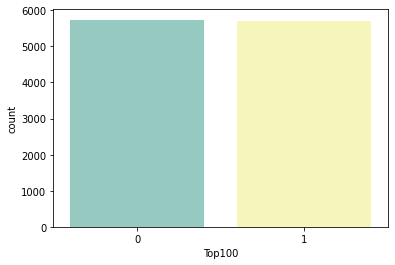

In [24]:
#plotting graph again to check for balanced datset
ax = sns.countplot(x = y_train, palette = "Set3")

# Logistic Regression Model

In [25]:
# Training the model
# Create logistic regression object
log_reg = LogisticRegression(random_state=10, solver = 'lbfgs')
# Train the model using the training set
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=10)

In [26]:
# Predictions on the testing set
log_reg.predict(X_test)
y_pred = log_reg.predict(X_test)


In [27]:
# Score- Returns the mean accuracy on the given test data and labels 
# Checking accuracy
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


The Testing Accuracy is:  0.6644529884655714


In [28]:
print("The Testing Accuracy is: ", log_reg.score(X_train, y_train))
print("The Training Accuracy is:",log_reg.score(X_test,y_test))

The Testing Accuracy is:  0.6757276461847741
The Training Accuracy is: 0.6644529884655714


In [29]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[ 823,  589],
       [ 371, 1078]], dtype=int64)

In [30]:
# Classification Report
from sklearn.metrics import classification_report
classification_report=classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.69      0.58      0.63      1412
           1       0.65      0.74      0.69      1449

    accuracy                           0.66      2861
   macro avg       0.67      0.66      0.66      2861
weighted avg       0.67      0.66      0.66      2861



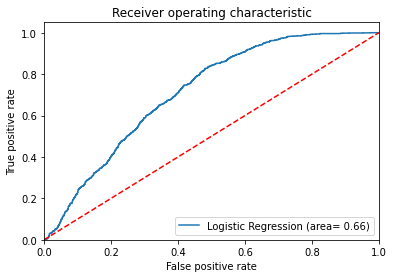

In [31]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc=roc_auc_score(y_test,log_reg.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,log_reg.predict_proba(X_test)[:,1])
plt.plot(fpr,tpr,label="Logistic Regression (area= %0.2f)" % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_RC')
plt.show()

# Hyperparameter tuning

In [35]:
param_grid=[
            {"penalty":["l1","l2","elasticnet","none"],
             "C":np.logspace(-4,4,20),
             "solver":["lbfgs","newton-cg","liblinear","sag","saga"],
             "max_iter":[100,1000,2000,5000]}
]

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
clf=GridSearchCV(log_reg,param_grid=param_grid,cv=5,verbose=True,n_jobs=-1)

In [38]:
best_clf=clf.fit(X_final,y_sm)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


In [39]:
best_clf.best_estimator_


LogisticRegression(C=1.623776739188721, random_state=10, solver='liblinear')

In [40]:
# Applying Model
log_reg2=LogisticRegression(C=1.623776739188721,penalty='l2',max_iter=100,solver='lbfgs')

In [41]:
# Fitting model
log_reg2.fit(X_train,y_train)

# Predictions
y_pred2=log_reg2.predict(X_test)

In [42]:
# Final accuracy
print("The Testing Accuracy is: ", log_reg2.score(X_test, y_test))

The Testing Accuracy is:  0.670394966794827


In [43]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_test, y_pred2)
confusion_matrix2


array([[ 822,  590],
       [ 353, 1096]], dtype=int64)

In [44]:
# Classificaltion report
from sklearn.metrics import classification_report
classification_report2=classification_report(y_test,y_pred2)
print(classification_report2)


              precision    recall  f1-score   support

           0       0.70      0.58      0.64      1412
           1       0.65      0.76      0.70      1449

    accuracy                           0.67      2861
   macro avg       0.67      0.67      0.67      2861
weighted avg       0.67      0.67      0.67      2861



# LDA:

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X_train, X_test, y_train, y_test = train_test_split(X_final, y_sm)
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [47]:
from sklearn.metrics import accuracy_score
y_pred3 = lda.predict(X_test)

In [48]:
# Final accuracy
print("The Testing Accuracy is: ", lda.score(X_test, y_test))

The Testing Accuracy is:  0.6753355704697986


In [49]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix3 = confusion_matrix(y_test, y_pred3)
confusion_matrix3

array([[1031,  700],
       [ 461, 1384]], dtype=int64)

In [50]:
# Classificaltion report
from sklearn.metrics import classification_report
classification_report3=classification_report(y_test,y_pred3)
print(classification_report3)

              precision    recall  f1-score   support

           0       0.69      0.60      0.64      1731
           1       0.66      0.75      0.70      1845

    accuracy                           0.68      3576
   macro avg       0.68      0.67      0.67      3576
weighted avg       0.68      0.68      0.67      3576



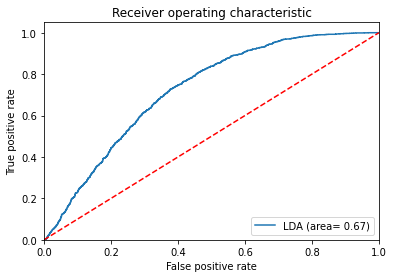

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
lda_roc_auc=roc_auc_score(y_test,lda.predict(X_test))
fpr2,tpr2,thresholds2=roc_curve(y_test,lda.predict_proba(X_test)[:,1])
plt.plot(fpr2,tpr2,label="LDA (area= %0.2f)" % lda_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LDA_RC')
plt.show()

# saving the model:

In [56]:
import pickle 
pickle.dump(log_reg2,open("log_model.pkl","wb"))

In [57]:
model=pickle.load(open("log_model.pkl","rb"))


In [59]:
data.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre,Top100
0,0.556,0.864,-5.870,0.0584,0.009580,0.000000,0.209,0.400,105.143,5,0
1,0.737,0.463,-7.828,0.0792,0.008170,0.447000,0.255,0.324,123.881,9,0
2,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.167,0.875,91.455,9,0
3,0.331,0.943,-3.188,0.0698,0.007210,0.000002,0.242,0.296,94.612,0,0
4,0.589,0.890,-3.719,0.0603,0.000481,0.000820,0.201,0.692,90.598,5,0


In [61]:
model.predict([[0.556,0.864,-5.874,0.0584,0.009580,0.0000,0.209,0.400,105.14,5]])

array([0], dtype=int64)

## Ridge and Lasso implementation:

In [ ]:
from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso

In [ ]:
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=.3)


In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
lasso.fit(X_train,y_train)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.  0.  0.  0. -0. -0. -0.  0. -0. -0.]


In [ ]:
print ("Lasso model:", (ridge.coef_))

Lasso model: [ 0.19660563 -0.7066762   2.1733763   0.03119483 -0.4384683  -0.39055966
 -0.18368887  0.03629215 -0.06773706 -0.25144346]


In [ ]:
print("Ridge Regression Model Training Score: ",ridge.score(X_train, y_train))

print("Ridge Regression Model Testing Score: ",ridge.score(X_test, y_test))

print("Lasso Regression Model Training Score: ",lasso.score(X_train, y_train))

print("Lasso Regression Model Testing Score: ",lasso.score(X_test, y_test))

Ridge Regression Model Training Score:  0.14155225123898696
Ridge Regression Model Testing Score:  0.15472624633042842
Lasso Regression Model Training Score:  0.0
Lasso Regression Model Testing Score:  -5.005260268919898e-06


In [ ]:
from sklearn.model_selection import GridSearchCV 
parameters={'alpha':[1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}


In [ ]:
lasso_regressor=GridSearchCV(lasso,parameters,cv=5)  
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
data.head()

,Danceability,Energy,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Genre,Top100
0,0.556,0.864,-5.870,0.0584,0.009580,0.000000,0.209,0.400,105.143,5,0
1,0.737,0.463,-7.828,0.0792,0.008170,0.447000,0.255,0.324,123.881,9,0
2,0.618,0.938,-3.442,0.0456,0.017900,0.000000,0.167,0.875,91.455,9,0
3,0.331,0.943,-3.188,0.0698,0.007210,0.000002,0.242,0.296,94.612,0,0
4,0.589,0.890,-3.719,0.0603,0.000481,0.000820,0.201,0.692,90.598,5,0


In [33]:

import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(first_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = base_features)

ModuleNotFoundError: No module named 'eli5'

In [35]:
!pip install eli5

You should consider upgrading via the 'c:\users\awesomeakbar\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.
